# **Rapport**

## *1. Exploration du jeu de données*

### *1.1 Import des données*


In [2]:
!file=1pfd5-i_F20zViKIYwbQ8jL1p78s_E6uX && wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='${file} -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="${file} -O images.zip && rm -rf /tmp/cookies.txt \
&& unzip -qq images.zip && \
git clone https://github.com/jbdel/miniVQA

--2020-11-25 20:21:33--  https://docs.google.com/uc?export=download&confirm=HTO8&id=1pfd5-i_F20zViKIYwbQ8jL1p78s_E6uX
Resolving docs.google.com (docs.google.com)... 74.125.203.113, 74.125.203.102, 74.125.203.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.203.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-7o-docs.googleusercontent.com/docs/securesc/gqoc8op61celqi4agfcpllf7j9p0q6ts/h40mgoqoqsi93aipgv2v5t35l2q7v22g/1606335675000/06540366866019348016/16487979738571240621Z/1pfd5-i_F20zViKIYwbQ8jL1p78s_E6uX?e=download [following]
--2020-11-25 20:21:33--  https://doc-0s-7o-docs.googleusercontent.com/docs/securesc/gqoc8op61celqi4agfcpllf7j9p0q6ts/h40mgoqoqsi93aipgv2v5t35l2q7v22g/1606335675000/06540366866019348016/16487979738571240621Z/1pfd5-i_F20zViKIYwbQ8jL1p78s_E6uX?e=download
Resolving doc-0s-7o-docs.googleusercontent.com (doc-0s-7o-docs.googleusercontent.com)... 74.125.204.132, 2404:6800:4008:c04::84
Connecting

In [3]:
!ls && ls -d miniVQA/*

image124  images.zip  miniVQA  sample_data
miniVQA/answer_list.txt      miniVQA/sample_submission.csv  miniVQA/val.csv
miniVQA/image_question.json  miniVQA/test.csv
miniVQA/README.md	     miniVQA/train.csv


In [4]:
!wc -l miniVQA/*.csv

  6288 miniVQA/sample_submission.csv
  6288 miniVQA/test.csv
 50300 miniVQA/train.csv
  6300 miniVQA/val.csv
 69176 total


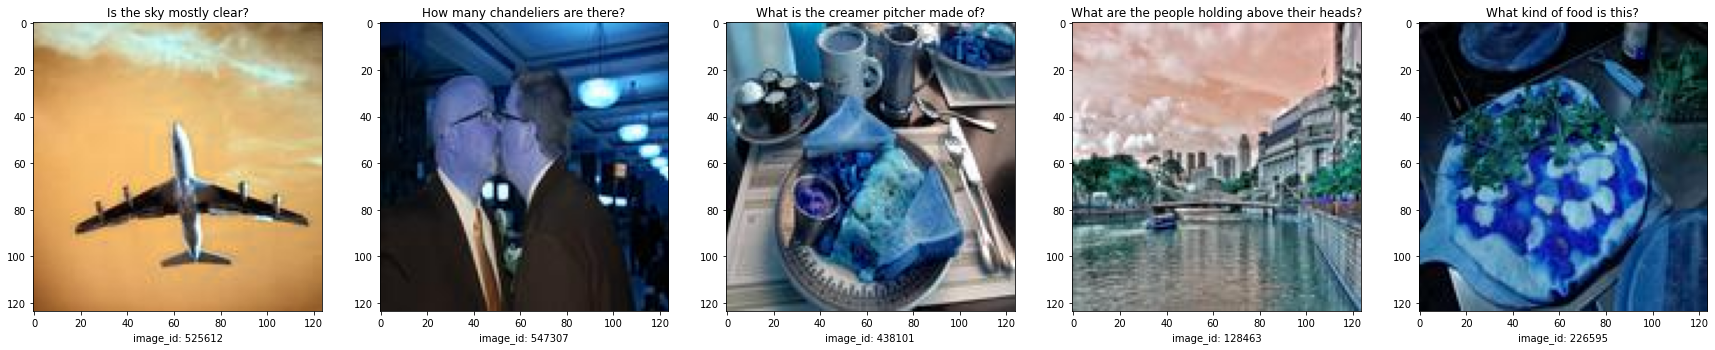

In [5]:
import json
import random
import matplotlib.pyplot as plt
import cv2

image_question = json.load(open('miniVQA/image_question.json'))
plt.figure(figsize=([30, 20]))

for i in range(5):
  plt.subplot(1, 5, i+1)
  random_image = random.choice(list(image_question.keys()))
  _, random_question = random.choice(image_question[random_image])
  plt.imshow(cv2.resize(cv2.imread('image124/'+random_image+'.jpg'), (124,124)))
  plt.xlabel('image_id: '+random_image)
  plt.title(random_question)

### *1.2 Analyse des données*

In [6]:
import pandas as pd

train_df = pd.read_csv("miniVQA/train.csv")
val_df = pd.read_csv("miniVQA/val.csv")

In [7]:
print('train unique labels',str(len(train_df["label"].unique())))
print('val unique labels',str(len(val_df["label"].unique())))

train unique labels 100
val unique labels 100


*Ici, on sait qu'une classe(label) a au moins une question qui lui est associée dans le train et le val*

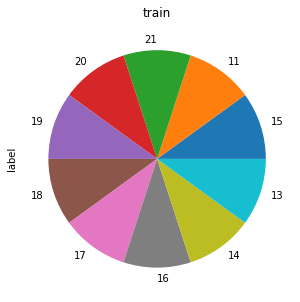

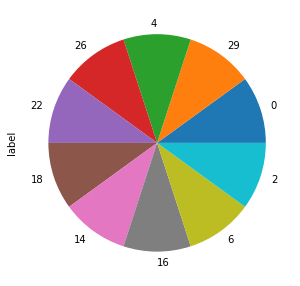

In [8]:
plt.figure()
train_df["label"].value_counts().head(10).plot.pie(figsize=(10, 5))
plt.title("train")
plt.show()

plt.figure()
val_df["label"].value_counts().head(10).plot.pie(figsize=(10, 5))
plt.show()